In [53]:
# imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# matplotlib preferences
mpl.rcdefaults()  # reset
plt.rc('axes', titlesize=20, labelsize=15, labelpad=2)
plt.rc('axes.formatter', limits=[-4, 4])
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('lines', linewidth=1, markersize=5)
plt.rc('figure', figsize=(5, 5))
#ax._get_lines.get_next_color()
# print(plt.rcParams) # all parameters

# Loading Code

In [132]:
data = pd.read_csv("times_CX2_high.csv", skiprows=1, )

print("keys:")
display(data.keys())

nodes = np.unique(data["nodes"])
print("nodes:", nodes)

widths = np.unique(data["width"])
print("widths:", widths)

print("dataframe:")
display(data)

keys:


Index(['nodes', 'width', 'height', 'iterations', 'periodic', 'time'], dtype='object')

nodes: [  8  16  25  36  49  64  81 100 121]
widths: [ 1000  2000  5000 10000]
dataframe:


,nodes,width,height,iterations,periodic,time
0,16,1000,1000,100,1,1.048080
1,25,1000,1000,100,1,1.219900
2,36,1000,1000,100,1,1.310140
3,49,1000,1000,100,1,1.286070
4,64,1000,1000,100,1,1.081130
5,81,1000,1000,100,1,0.954951
6,100,1000,1000,100,1,0.874308
7,121,1000,1000,100,1,0.925483
8,16,2000,2000,100,1,2.709660
9,25,2000,2000,100,1,3.161170


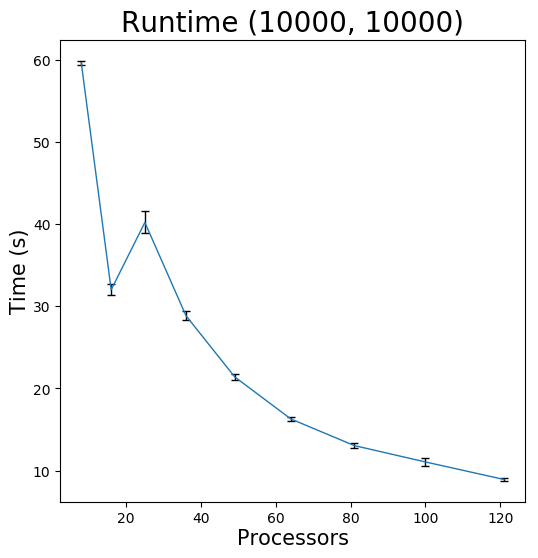

In [138]:
# group and average
size = 10000
tmp = data[data["width"] == size]
avg = tmp.groupby("nodes").mean()
ste = tmp.groupby("nodes").sem()
#display(tmp)

# plot
fig, ax = plt.subplots(figsize=[6, 6])
avg.plot(y="time", use_index=True, style='--', ax=ax, legend=False, yerr=ste["time"], capsize=3, ecolor='k')
ax.set(title="Runtime (%i, %i)"%(size, size), xlabel="Processors", ylabel="Time (s)")

# save
fig.savefig("runtime_10000.png")

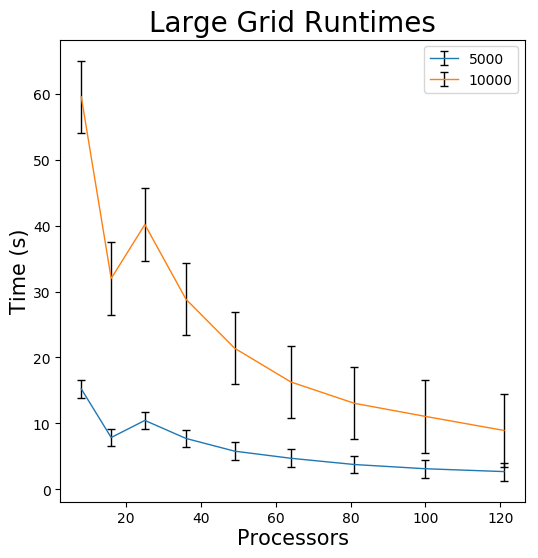

In [145]:
# plot
fig, ax = plt.subplots(figsize=[6, 6])
for width in [5000, 10000]:
    select = data[data["width"] == width]
    select = select.groupby(["nodes"], as_index=False)
    select = select.mean()
    err = select.sem()
    select.plot(x="nodes", y="time", style='-o', ax=ax, legend=False, yerr=err["time"], 
                color=ax._get_lines.get_next_color(), capsize=3, ecolor='k')
ax.set(title="Large Grid Runtimes", xlabel="Processors", ylabel="Time (s)")
ax.legend([5000, 10000])

# save
fig.savefig("runtime_long.png")

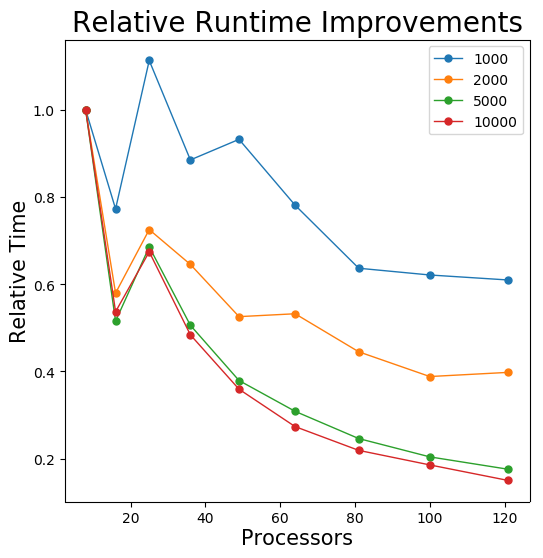

In [143]:
# plot
fig, ax = plt.subplots(figsize=[6, 6])
for width in widths:
    select = data[data["width"] == width]
    select = select.groupby(["nodes"], as_index=False)
    select = select.mean()
    select["time"] = select["time"] / select["time"].iloc[0]
    select.plot(x="nodes", y="time", style='-o', ax=ax, legend=False, color=ax._get_lines.get_next_color())
ax.set(title="Relative Runtime Improvements", xlabel="Processors", ylabel="Relative Time")
ax.legend(widths)

# save
fig.savefig("relative_improvements.png")

# Load Different Data

In [118]:
data = pd.read_csv("times_CX2_small.csv", skiprows=1, )

print("keys:")
display(data.keys())

nodes = np.unique(data["nodes"])
print("nodes:", nodes)

widths = np.unique(data["width"])
print("widths:", widths)

print("dataframe:")
display(data)

keys:


Index(['nodes', 'width', 'height', 'iterations', 'periodic', 'time'], dtype='object')

nodes: [  4   9  16  25  36  49  64  81 100 124]
widths: [100 200 400]
dataframe:


,nodes,width,height,iterations,periodic,time
0,4,100,100,200,1,0.505546
1,9,100,100,200,1,0.783778
2,16,100,100,200,1,0.816848
3,25,100,100,200,1,1.144520
4,36,100,100,200,1,4.209220
5,49,100,100,200,1,5.233190
6,64,100,100,200,1,6.769250
7,81,100,100,200,1,9.779440
8,100,100,100,200,1,12.096500
9,124,100,100,200,1,12.769800


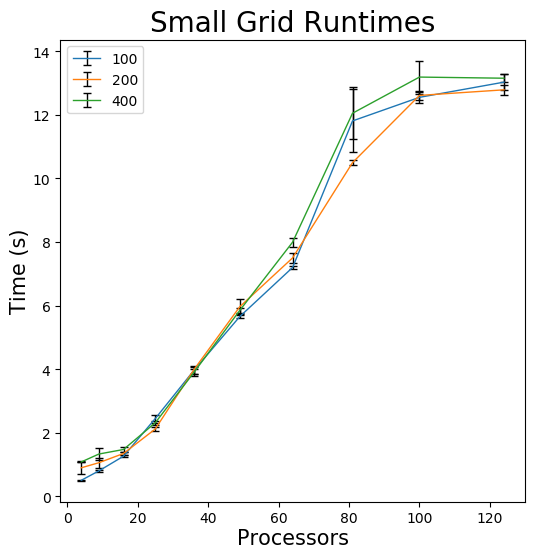

In [131]:
# group and average
fig, ax = plt.subplots(figsize=[6, 6])
for width in widths:
    tmp = data[data["width"] == width]
    avg = tmp.groupby("nodes").mean()
    ste = tmp.groupby("nodes").sem()
    #display(tmp)

    # plot
    avg.plot(y="time", use_index=True, style='-', ax=ax, legend=False, yerr=ste["time"], 
             capsize=3, ecolor='k', color = ax._get_lines.get_next_color())
ax.set(title="Small Grid Runtimes", xlabel="Processors", ylabel="Time (s)")
ax.legend(widths)
# save
fig.savefig("small_grid_runtimes.png")